# **`Group 4 Python Project`**

## Exploratory Data analysis

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('combined_Microplan_2025.xlsx')

In [3]:
data.head(2)

,Lga,Ward,Health Facility,Ownership (Public/Private),Facility Type (Primary/Secondary/Tertiary),S/No.,Settlement,Total Population Of The Settlement,Number Of Under-1 (Tp),Number Of Under-5 (Tp),...,Dispersible Amoxycilin,Ors,Zinc Tablets,Injectable Antibiotics,Chlohexidine,Resuscitation,Anc Corticosteriods,Implants,Female Condoms,Emergency Contraception
0,Kudan,Doka,Doka Primary Healthy Centre,Public,Primary,1,"Ang, Sarkin",601.0,24.04,120.2,...,100,100,10,100,100,10,10,30,100,10
1,Kudan,Doka,Doka Primary Healthy Centre,Public,Primary,2,"Ang, Fawa",423.0,16.92,84.6,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.columns.tolist()
output=None

![separator1](https://i.imgur.com/ZUWYTii.png)
## **`Data Cleaning & Exploration`**

In [53]:
data[data["Ward"] == 'Mallagum']
# Replacing the inappropriate values in the LGA column
data["Lga"].replace({
    "`": "Kaura",
    "Kpak": "Kaura"
})

0               Kudan
1               Kudan
2               Kudan
3               Kudan
4               Kudan
             ...     
11410    Zangon Kataf
11411    Zangon Kataf
11412    Zangon Kataf
11413    Zangon Kataf
11414    Zangon Kataf
Name: Lga, Length: 11415, dtype: object

In [6]:
# Define staff_cols before using it
staff_cols = ['Nurse', 'Midwife', 'Cho', 'Chew', 'Jchew']
data[staff_cols]= data[staff_cols].replace({
    "S":'0',
    "-":'0',
    "O":'0'
})

In [7]:
data[staff_cols]=data[staff_cols].fillna(0).astype('float')

In [8]:
data['Lga'].nunique()

23

In [9]:
data["Ward"].unique()

output=None

In [10]:
data["Ward"].str.contains("Nanadu").value_counts()
data["Ward"].str.contains("Nandu").value_counts()
data["Ward"].str.contains("Kuyelo").value_counts()

output=None

In [11]:
data["Ward"] = data["Ward"].replace({
    "Nanadu": "Nandu",
    "Tw North": "Tudun wada North"
})

In [12]:
data[["Ward","Lga"]].value_counts()

Ward              Lga         
Daddu             Jaba            155
Kudaru            Lere            140
Kayarda           Lere            130
Idon              Kajuru          122
Dutsen Abba       Zaria           121
                                 ... 
Tudun wada North  Kaduna South      5
Unguwan Gabas     Sabon Gari        5
Ung. Sarki        Kaduna North      4
Sabon Gari South  Kaduna South      2
Agban             Lere              1
Name: count, Length: 255, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11415 entries, 0 to 11414
Columns: 136 entries, Lga to Emergency Contraception
dtypes: float64(64), int64(1), object(71)
memory usage: 11.8+ MB


In [14]:
data.columns= data.columns.str.replace(" ", "_")
data.columns=data.columns.str.strip()

In [15]:
data.head(1)

,Lga,Ward,Health_Facility,Ownership_(Public/Private),Facility_Type_(Primary/Secondary/Tertiary),S/No.,Settlement,Total_Population_Of_The_Settlement,Number_Of_Under-1_(Tp),Number_Of_Under-5_(Tp),...,Dispersible_Amoxycilin,Ors,Zinc_Tablets,Injectable_Antibiotics,Chlohexidine,Resuscitation,Anc_Corticosteriods,Implants,Female_Condoms,Emergency_Contraception
0,Kudan,Doka,Doka Primary Healthy Centre,Public,Primary,1,"Ang, Sarkin",601.0,24.04,120.2,...,100,100,10,100,100,10,10,30,100,10


In [16]:
data.loc[:, "Total_Population_Of_The_Settlement":"Emergency_Contraception"] = round(data.loc[:, "Total_Population_Of_The_Settlement":"Emergency_Contraception"])

In [17]:
data.head(3)

,Lga,Ward,Health_Facility,Ownership_(Public/Private),Facility_Type_(Primary/Secondary/Tertiary),S/No.,Settlement,Total_Population_Of_The_Settlement,Number_Of_Under-1_(Tp),Number_Of_Under-5_(Tp),...,Dispersible_Amoxycilin,Ors,Zinc_Tablets,Injectable_Antibiotics,Chlohexidine,Resuscitation,Anc_Corticosteriods,Implants,Female_Condoms,Emergency_Contraception
0,Kudan,Doka,Doka Primary Healthy Centre,Public,Primary,1,"Ang, Sarkin",601.0,24.0,120.0,...,100,100,10,100,100,10,10,30,100,10
1,Kudan,Doka,Doka Primary Healthy Centre,Public,Primary,2,"Ang, Fawa",423.0,17.0,85.0,...,0,0,0,0,0,0,0,0,0,0
2,Kudan,Doka,Doka Primary Healthy Centre,Public,Primary,3,"Ang, Makera",467.0,19.0,93.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data.columns.tolist()

['Lga',
 'Ward',
 'Health_Facility',
 'Ownership_(Public/Private)',
 'Facility_Type_(Primary/Secondary/Tertiary)',
 'S/No.',
 'Settlement',
 'Total_Population_Of_The_Settlement',
 'Number_Of_Under-1_(Tp)',
 'Number_Of_Under-5_(Tp)',
 'Number_Of_6-59_Months_(Tp)',
 'Number_Of__Pregant_Women',
 'Number_Of_Wra',
 'Young_Adolescents\n10-14_Years_',
 'Older_Adolescents_\n15-19_Years',
 'No_Of_Persons_With_Disabilities_',
 'Physically_Challenged',
 'Visually_Impaired',
 'Hearing_Impaired',
 'Albinism',
 'Intellectually_Disability',
 'Mentally_Challenged_',
 'Distance_To_Health_Facility_(Km)',
 'Htr_(Yes/No)',
 'Security_Compromised_(Yes/No)',
 'Officer_In_Charge',
 'Phone_Number',
 'Nurse',
 'Midwife',
 'Cho',
 'Chew',
 'Jchew',
 'Name_Of_Mai_Unguwa',
 'Phone_Number.2',
 'Name_Of_Community_Volunteer',
 'Phone_Number_',
 'Name_Of_Ward_Ce_Focal_Persion',
 'Phone_Number.1',
 'Name_Of_Primary_School/Quranic_&_Ismamic_School',
 'Church/Mosque',
 'Market/Play_Ground',
 'Bcg',
 'Bopv',
 'Hepbo',
 '

**Checking and converting the columns to the necessary datatypes**

In [19]:
data.dtypes.value_counts()
data["Total_Population_Of_The_Settlement"].dtype
data.loc[:, "Total_Population_Of_The_Settlement":"Mentally_Challenged_"].dtypes
data.loc[:, 'Zinc_Ors':].dtypes.value_counts()
data.iloc[:, -35:].dtypes
data.loc[:, "Bcg":] = data.loc[:, "Bcg":].apply(pd.to_numeric, errors='coerce')
data.loc[:, "Bcg":].dtypes

Bcg                        float64
Bopv                       float64
Hepbo                      float64
Ipv                        float64
Penta                      float64
                            ...   
Resuscitation               object
Anc_Corticosteriods         object
Implants                    object
Female_Condoms              object
Emergency_Contraception     object
Length: 95, dtype: object

![separator1](https://i.imgur.com/ZUWYTii.png)
## **Question 1**
`Which LGAs have the highest population but poorest access to facilities?`

In [20]:
# Suming the Total population of the settlement by LGA
data.groupby('Lga')['Total_Population_Of_The_Settlement'].sum()

data.groupby('Lga')['Distance_To_Health_Facility_(Km)'].value_counts()

Lga           Distance_To_Health_Facility_(Km)
Birnin Gwari  Less Than 2Km                       154
              Between 2 And 5Km                   142
              Greater Than 5Km                    126
Chikun        Between 2 And 5Km                   219
              Less Than 2Km                       120
                                                 ... 
Zangon Kataf  Less Than 2Km                       286
              Greater Than 5Km                     77
Zaria         Less Than 2Km                       279
              Between 2 And 5Km                   104
              Greater Than 5Kms                    30
Name: count, Length: 78, dtype: int64

In [21]:
data.groupby('Lga')['Total_Population_Of_The_Settlement'].sum()
output=None

In [22]:
def parse_distance(text):
    if pd.isna(text): return np.nan
    text = str(text).lower()
    
    # Extract all numbers from the string
    numbers = [float(n) for n in re.findall(r"[-+]?\d*\.\d+|\d+", text)]
    
    if 'between' in text or '-' in text:
        return np.mean(numbers) if len(numbers) >= 2 else (numbers[0] if numbers else np.nan)
    elif 'greater' in text or 'more' in text:
        return numbers[0] + 0.5  # Representative value (e.g., >5 becomes 5.5)
    elif 'less' in text:
        return numbers[0] / 2    # Representative value (e.g., <2 becomes 1.0)
    elif len(numbers) == 1:
        return numbers[0]
    return np.nan

In [23]:
# Clean the distance column
data['Distance_Numeric'] = data['Distance_To_Health_Facility_(Km)'].apply(parse_distance)

# 2. Group by LGA
lga_analysis = data.groupby('Lga').agg({
    'Total_Population_Of_The_Settlement': 'sum',
    'Distance_Numeric': 'mean'}).reset_index()

# 3. Create a Priority Score
# We normalize both columns to a 0-1 scale so they have equal weight
lga_analysis['Pop_Score'] = (lga_analysis['Total_Population_Of_The_Settlement'] - lga_analysis['Total_Population_Of_The_Settlement'].min()) / (lga_analysis['Total_Population_Of_The_Settlement'].max() - lga_analysis['Total_Population_Of_The_Settlement'].min())
lga_analysis['Dist_Score'] = (lga_analysis['Distance_Numeric'] - lga_analysis['Distance_Numeric'].min()) / (lga_analysis['Distance_Numeric'].max() - lga_analysis['Distance_Numeric'].min())

# Total Priority (Higher is more critical: High Pop + High Distance)
lga_analysis['Priority_Index'] = lga_analysis['Pop_Score'] + lga_analysis['Dist_Score']

# 4. Sort and View Results
priority_list = lga_analysis.sort_values(by='Priority_Index', ascending=False)
print(priority_list[['Lga', 'Total_Population_Of_The_Settlement', 'Distance_Numeric', 'Priority_Index']].head(10))

             Lga  Total_Population_Of_The_Settlement  Distance_Numeric  \
3          Igabi                            751398.0          3.240288   
1         Chikun                            626120.0          2.998721   
2           Giwa                            498986.0          3.191910   
20          Soba                            510837.0          3.125407   
21  Zangon Kataf                            551071.0          2.735695   
0   Birnin Gwari                            431946.0          3.184834   
7         Kachia                            425492.0          3.181018   
22         Zaria                            711028.0          1.956416   
16          Lere                            577105.0          2.459431   
10       Kagarko                            419689.0          3.031746   

    Priority_Index  
3         1.938091  
1         1.612540  
2         1.465712  
20        1.459092  
21        1.367973  
0         1.342667  
7         1.329508  
22        1.32817

In [24]:
# Define lga_analysis, priority_list, and df_top10 before using them
# Assuming parse_distance function and data are defined
# Clean the distance column
data['Distance_Numeric'] = data['Distance_To_Health_Facility_(Km)'].apply(parse_distance)

# 2. Group by LGA
lga_analysis = data.groupby('Lga').agg({
    'Total_Population_Of_The_Settlement': 'sum',
    'Distance_Numeric': 'mean'}).reset_index()

# 3. Create a Priority Score
# We normalize both columns to a 0-1 scale so they have equal weight
lga_analysis['Pop_Score'] = (lga_analysis['Total_Population_Of_The_Settlement'] - lga_analysis['Total_Population_Of_The_Settlement'].min()) / (lga_analysis['Total_Population_Of_The_Settlement'].max() - lga_analysis['Total_Population_Of_The_Settlement'].min())
lga_analysis['Dist_Score'] = (lga_analysis['Distance_Numeric'] - lga_analysis['Distance_Numeric'].min()) / (lga_analysis['Distance_Numeric'].max() - lga_analysis['Distance_Numeric'].min())

# Total Priority (Higher is more critical: High Pop + High Distance)
lga_analysis['Priority_Index'] = lga_analysis['Pop_Score'] + lga_analysis['Dist_Score']

# 4. Sort and View Results
priority_list = lga_analysis.sort_values(by='Priority_Index', ascending=False)
df_top10 = priority_list.head(10)

df_top10['Total_Population_Of_The_Settlement']

3     751398.0
1     626120.0
2     498986.0
20    510837.0
21    551071.0
0     431946.0
7     425492.0
22    711028.0
16    577105.0
10    419689.0
Name: Total_Population_Of_The_Settlement, dtype: float64

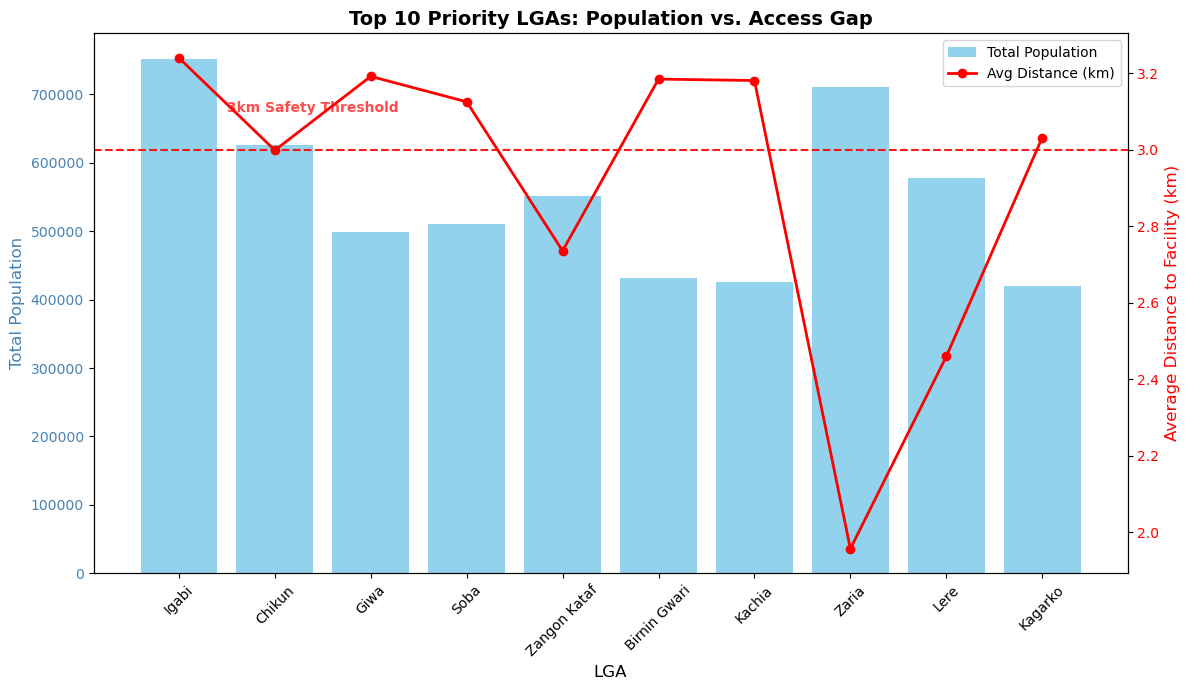

In [25]:
df_top10 = priority_list.head(10)

fig, ax1 = plt.subplots(figsize=(12, 7))

# 1. Primary Y-axis: Population (Bars)
ax1.bar(df_top10['Lga'], df_top10['Total_Population_Of_The_Settlement'], 
        color='skyblue', alpha=0.9, label='Total Population')
ax1.set_xlabel('LGA', fontsize=12)
ax1.set_ylabel('Total Population', color='steelblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_title('Top 10 Priority LGAs: Population vs. Access Gap', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# 2. Secondary Y-axis: Distance (Line)
ax2 = ax1.twinx()
ax2.plot(df_top10['Lga'], df_top10['Distance_Numeric'], 
         color='red', marker='o', linewidth=2, label='Avg Distance (km)')
ax2.set_ylabel('Average Distance to Facility (km)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# 3. Add a "Risk Threshold" line (e.g., at 3km)
ax2.axhline(3.0, color='red', linestyle='--', alpha=0.9)
ax2.text(0.5, 3.1, '3km Safety Threshold', color='red', fontweight='bold', alpha=0.7)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('LGA_Health_Priority_Chart.png', dpi=300, bbox_inches='tight') # Saving the image
plt.show()

In [26]:
data.columns.tolist()
output=None

![separator1](https://i.imgur.com/ZUWYTii.png)
## **Question 2**
`Are vaccines aligned with the Under-5 population distribution?`

In [27]:
# List of vaccine columns
vaccine_cols = ['Bcg', 'Bopv', 'Hepbo', 'Ipv', 'Penta', 'Pcv', 'Measles', 'Td', 'Mena', 'Yellow_Fever', 'Hpv', 'Covid-19']
#vaccine_cols =['Bcg', 'Penta']
# Create a Total Vaccine column
data['Total_Vaccine_Stock'] = data[vaccine_cols].sum(axis=1)

# Group by Facility or Ward
facility_summary = data.groupby('Health_Facility').agg({
    'Number_Of_Under-5_(Tp)': 'sum',
    'Total_Vaccine_Stock': 'sum'
})

In [28]:
facility_summary.sort_values(by='Number_Of_Under-5_(Tp)',ascending=True).head(10)

,Number_Of_Under-5_(Tp),Total_Vaccine_Stock
Health_Facility,,
Hc Idon Hanya,22.0,176.0
Ung.Yuli,71.0,555.0
Hc Idon Hanya,80.0,624.0
Health Clinic Talata,84.0,655.0
Health Clinicgidan Gajere,87.0,680.0
Hc Idon Hanya,97.0,760.0
Healthclinic Dankande,113.0,879.0
Kwakwaren Manu Health Clinic,118.0,919.0
Ung Yuli,131.0,1020.0


**`Top 10 Underserved`**

In [29]:
# Calculate the ratio
data['Vaccines_Per_Child'] = data['Total_Vaccine_Stock'] / data['Number_Of_Under-5_(Tp)']

# Sort by the lowest ratio to find facilities with the worst alignment (underserved)
underserved = data.sort_values(by='Vaccines_Per_Child').tail(10)
#print("Facilities with the highest risk of stock-out:")
print(underserved[['Health_Facility', 'Vaccines_Per_Child']])

       Health_Facility  Vaccines_Per_Child
7754     H/C Ngari Nok           16.230769
11193     Magamiya Phc           16.250000
9940         Hc Memdor           16.272727
10004         Pankore            16.300000
2513        Marmara Hc           16.333333
9662          Hc Kusam           16.375000
10020  Dogon Kurmi Phc           16.400000
9971          Kafarma            16.444444
7705           Phc Nok           16.500000
11002      Mabushi Phc           17.895184


In [30]:
# Define thresholds (using medians is a good starting point)
pop_threshold = data['Number_Of_Under-5_(Tp)'].median()
stock_threshold = data['Total_Vaccine_Stock'].median()

def check_alignment(row):
    if row['Number_Of_Under-5_(Tp)'] > pop_threshold and row['Total_Vaccine_Stock'] < stock_threshold:
        return 'Critical Mismatch (High Need, Low Stock)'
    elif row['Number_Of_Under-5_(Tp)'] > pop_threshold and row['Total_Vaccine_Stock'] > stock_threshold:
        return 'Well Aligned (High Demand Met)'
    elif row['Number_Of_Under-5_(Tp)'] < pop_threshold and row['Total_Vaccine_Stock'] > stock_threshold:
        return 'Over-supplied (Low Demand, High Stock)'
    else:
        return 'Low Priority.'

data['Alignment_Status'] = data.apply(check_alignment, axis=1)

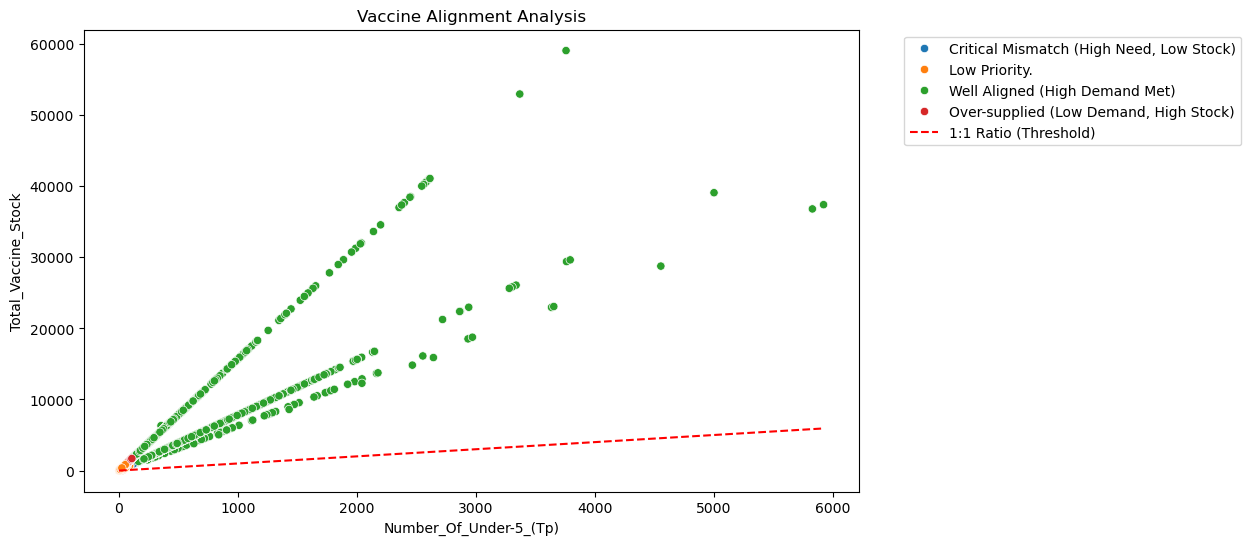

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Number_Of_Under-5_(Tp)', y='Total_Vaccine_Stock', hue='Alignment_Status')

# Add a reference line for 1 vaccine per child
line_max = data['Number_Of_Under-5_(Tp)'].max()
plt.plot([0, line_max], [0, line_max], color='red', linestyle='--', label='1:1 Ratio (Threshold)')

plt.title('Vaccine Alignment Analysis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

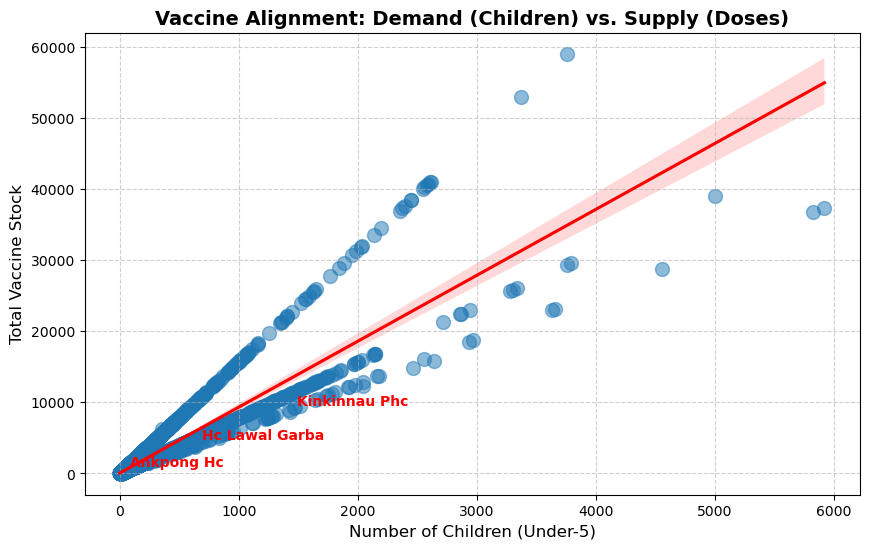

In [32]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with a regression line
sns.regplot(data=data, x='Number_Of_Under-5_(Tp)', y='Total_Vaccine_Stock', 
            scatter_kws={'alpha':0.5, 's':100}, line_kws={'color':'red', 'label':'Alignment Trend'})

plt.title('Vaccine Alignment: Demand (Children) vs. Supply (Doses)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Children (Under-5)', fontsize=12)
plt.ylabel('Total Vaccine Stock', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Label a few outliers for the presentation
# (This helps stakeholders see exactly which facilities are the 'mismatches')
top_mismatch = data.nsmallest(3, 'Vaccines_Per_Child')
for i, row in top_mismatch.iterrows():
    plt.annotate(row['Health_Facility'], (row['Number_Of_Under-5_(Tp)'], row['Total_Vaccine_Stock']),
                 xytext=(5,5), textcoords='offset points', color='red', fontweight='bold')

plt.savefig('Vaccine_Alignment_Scatter.png', dpi=300, bbox_inches='tight')
plt.show()

![separator1](https://i.imgur.com/ZUWYTii.png)
## **Question 3**
`Where are pregnant women and WRA underserved?`

In [33]:
# 1. Define Service Indicators
maternal_services = ['Anc_Register_(1_Per_Hf)', 'Anc_Card']
fp_commodities = ['Mini_Pills', 'Combine_Pills', 'Female_Condoms', 'Iucd', 'Jadel_(Implant)', 
                  'Impalanon_(Implant)', 'Depo-Provera_Inj', 'Nortisterat_Inj']
essential_maternal_drugs = ['Fesolate_Tabs', 'Folic_Acid', 'Pt_Test_Kit_(Pkt_20)']

In [34]:
# 2. Calculate Service Readiness Scores (0 = No stock/register, 1 = Available)
data['Maternal_Service_Score'] = data[maternal_services].sum(axis=1)
data['FP_Method_Mix'] = data[fp_commodities].gt(0).sum(axis=1) # Counts how many different methods are available
data['Maternal_Drug_Stock'] = data[essential_maternal_drugs].sum(axis=1)

In [35]:
# 3. Group by Ward or LGA
underserved_analysis = data.groupby(['Lga', 'Ward']).agg({
    'Number_Of__Pregant_Women': 'sum',
    'Number_Of_Wra': 'sum',
    'Maternal_Service_Score': 'mean',
    'FP_Method_Mix': 'mean',
    'Maternal_Drug_Stock': 'mean',
    'Distance_Numeric': 'mean' # Using the numeric cleaner from earlier
}).reset_index()

In [36]:
underserved_analysis.head()

,Lga,Ward,Number_Of__Pregant_Women,Number_Of_Wra,Maternal_Service_Score,FP_Method_Mix,Maternal_Drug_Stock,Distance_Numeric
0,Birnin Gwari,Damari,2919.0,513.0,119.454545,6.863636,7028.272727,2.545455
1,Birnin Gwari,Dogon Dawa,3243.0,572.0,171.705882,6.941176,10106.470588,2.823529
2,Birnin Gwari,Gayam,1230.0,216.0,33.636364,6.121212,1972.606061,3.015152
3,Birnin Gwari,Kakangi,2049.0,355.0,30.766667,6.066667,1805.533333,3.533333
4,Birnin Gwari,Kutemeshi,1516.0,268.0,33.292683,6.073171,1961.000000,3.646341


In [37]:
# Calculate Gap Scores
underserved_analysis['Maternal_Gap_Score'] = underserved_analysis['Number_Of__Pregant_Women'] / (underserved_analysis['Maternal_Service_Score'] + 1)
underserved_analysis['FP_Gap_Score'] = underserved_analysis['Number_Of_Wra'] / (underserved_analysis['FP_Method_Mix'] + 1)

# Sort to find the most underserved Wards
top_maternal_gaps = underserved_analysis.sort_values('Maternal_Gap_Score', ascending=False).head(10)
top_fp_gaps = underserved_analysis.sort_values('FP_Gap_Score', ascending=False).head(10)

In [38]:
top_maternal_gaps[["Lga","Ward", "Number_Of__Pregant_Women", "Maternal_Drug_Stock", "Maternal_Gap_Score"]]

,Lga,Ward,Number_Of__Pregant_Women,Maternal_Drug_Stock,Maternal_Gap_Score
17,Chikun,Narayi,2586.0,6897.321429,733.31983
41,Igabi,Rigachikun,5195.0,3931.714286,336.712963
57,Jaba,Daddu,3434.0,1263.290323,164.534776
182,Lere,Kudaru,3134.0,1185.907143,147.631225
181,Lere,Kayarda,3027.0,1234.461538,137.590909
243,Zaria,Dutsen Abba,3465.0,1514.776860,129.163586
183,Lere,Lazuru Tudai,2594.0,1146.175000,126.22871
127,Kajuru,Idon,654.0,283.377049,112.061798
178,Lere,Dan Alhaji,2903.0,1553.333333,105.158068
180,Lere,Gure/Kahugu,4341.0,2369.134021,104.928233


In [39]:
top_fp_gaps[["Lga","Ward","Number_Of_Wra", "FP_Method_Mix", 'FP_Gap_Score']]

,Lga,Ward,Number_Of_Wra,FP_Method_Mix,FP_Gap_Score
90,Kaduna North,Badarawa,40160.0,7.000000,5020.000000
92,Kaduna North,Hayin Banki,25904.0,7.000000,3238.000000
94,Kaduna North,Kawo,25616.0,7.000000,3202.000000
240,Zangon Kataf,Zonkwa,23935.0,7.102564,2954.003165
236,Zangon Kataf,Ungwan Gaiya,23470.0,7.038462,2919.712919
233,Zangon Kataf,Ikulu,20515.0,7.090909,2535.561798
101,Kaduna North,Ung. Shanu,16541.0,7.000000,2067.625000
221,Soba,Gamagira,15760.0,7.111111,1943.013699
115,Kagarko,Aribi,16851.0,8.000000,1872.333333
116,Kagarko,Iddah,16113.0,8.000000,1790.333333


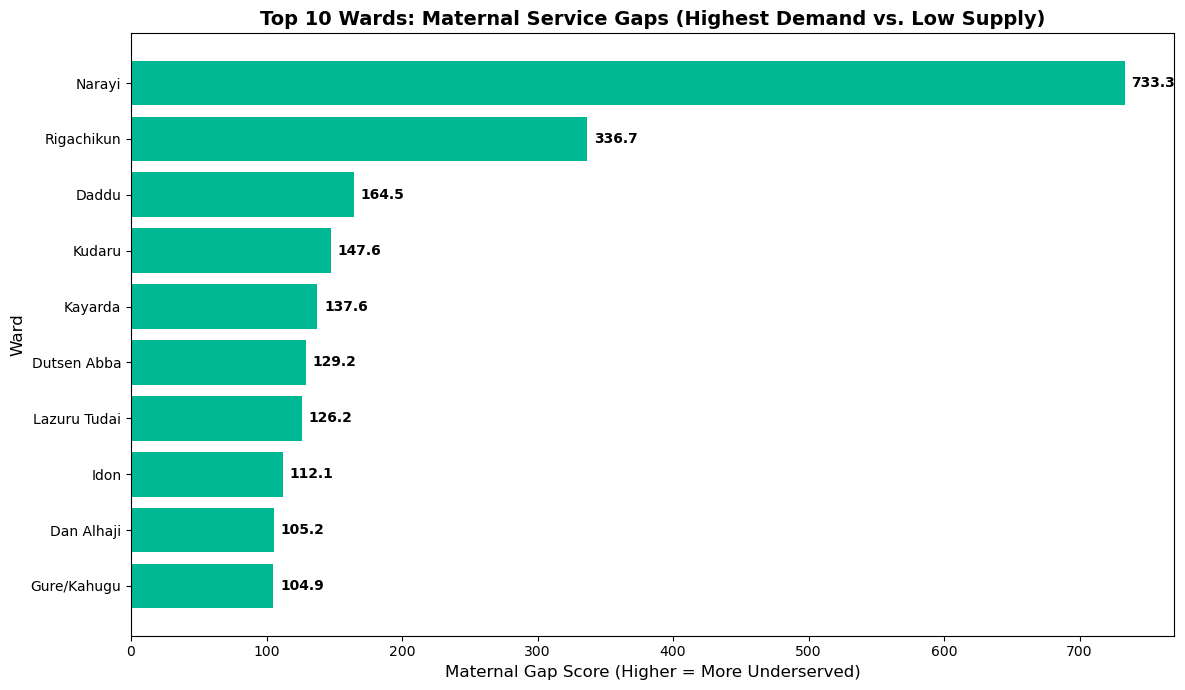

Chart saved as 'Maternal_Health_Gap_Chart.png'


In [40]:
# Using the Top 10 Maternal Gaps from your data
df_maternal = top_maternal_gaps.head(10).sort_values('Maternal_Gap_Score', ascending=True)

plt.figure(figsize=(12, 7))
bars = plt.barh(df_maternal['Ward'], df_maternal['Maternal_Gap_Score'], color='#00b894')

# Add styling and labels
plt.title('Top 10 Wards: Maternal Service Gaps (Highest Demand vs. Low Supply)', fontsize=14, fontweight='bold')
plt.xlabel('Maternal Gap Score (Higher = More Underserved)', fontsize=12)
plt.ylabel('Ward', fontsize=12)

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{width:.1f}', 
             va='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.savefig('Maternal_Health_Gap_Chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved as 'Maternal_Health_Gap_Chart.png'")

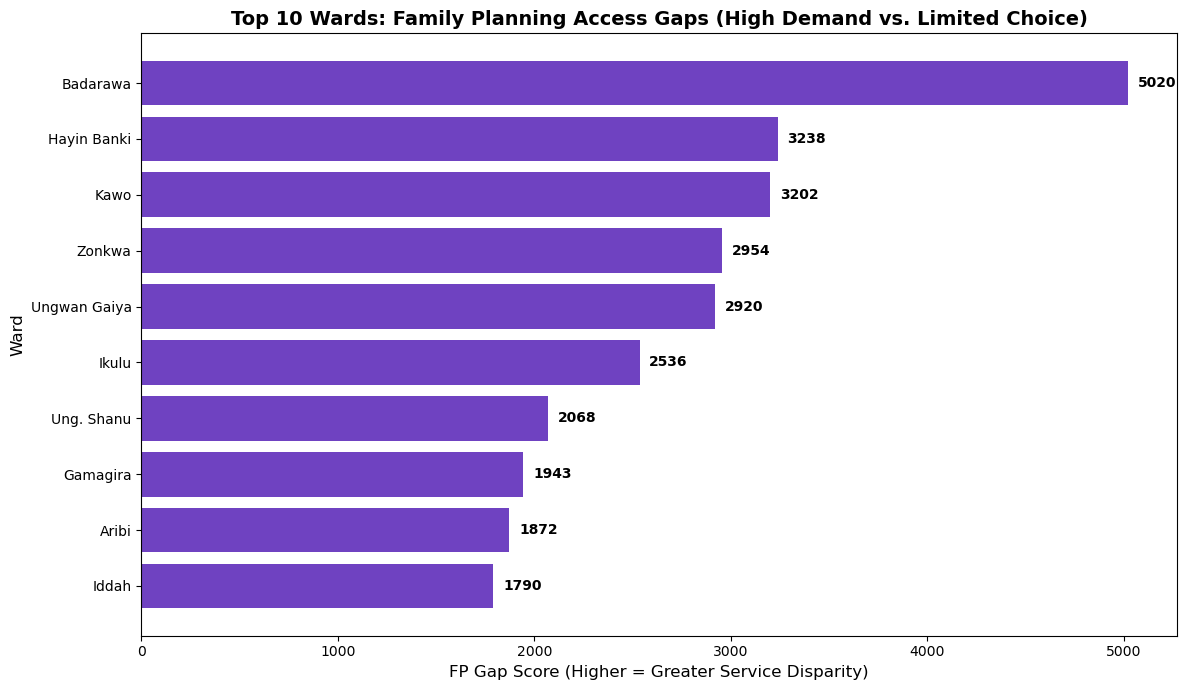

Chart saved as 'FP_Access_Gap_Chart.png'


In [41]:
df_fp = top_fp_gaps.head(10).sort_values('FP_Gap_Score', ascending=True)

plt.figure(figsize=(12, 7))

# Using a distinct color (purple/indigo) to differentiate FP from Maternal charts
bars = plt.barh(df_fp['Ward'], df_fp['FP_Gap_Score'], color='#6f42c1')

# Styling and Labels
plt.title('Top 10 Wards: Family Planning Access Gaps (High Demand vs. Limited Choice)', fontsize=14, fontweight='bold')
plt.xlabel('FP Gap Score (Higher = Greater Service Disparity)', fontsize=12)
plt.ylabel('Ward', fontsize=12)

# Add data labels for clear reporting
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
             va='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()

# Save the image for your presentation
plt.savefig('FP_Access_Gap_Chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved as 'FP_Access_Gap_Chart.png'")

![separator1](https://i.imgur.com/ZUWYTii.png)
## **Question 4**
`How do HTR and security risks affect service readiness?`

In [42]:
# Defragment the DataFrame to avoid performance warnings
data = data.copy()

# Create a Risk Flag
# This combines both HTR and Security into one risk category
data['At_Risk'] = ((data['Htr_(Yes/No)'] == 'Yes') | (data['Security_Compromised_(Yes/No)'] == 'Yes')).map({True: 'Risk Area', False: 'Safe Area'})

# Group staff and commodities for easier comparison
staff_cols = ['Nurse', 'Midwife', 'Cho', 'Chew', 'Jchew']
commodity_cols = ['Mini_Pills', 'Combine_Pills', 'Female_Condoms', 'Iucd', 'Jadel_(Implant)', 
'Impalanon_(Implant)', 'Depo-Provera_Inj', 'Nortisterat_Inj', 'Fesolate_Tabs', 'Folic_Acid', 'Zinc_Ors']

# Calculate totals per facility
data['Total_Staff'] = data[staff_cols].sum(axis=1)
data['Total_Commodities'] = data[commodity_cols].sum(axis=1)

In [43]:
# Create a comparison table
risk_comparison = data.groupby('At_Risk').agg({
    'Total_Staff': 'mean',
    'Total_Commodities': 'mean',
    'Distance_Numeric': 'mean'
}).round(2)

print(risk_comparison)

           Total_Staff Total_Commodities  Distance_Numeric
At_Risk                                                   
Risk Area         0.22        2367.64342              3.63
Safe Area         0.39       3942.262794              2.17


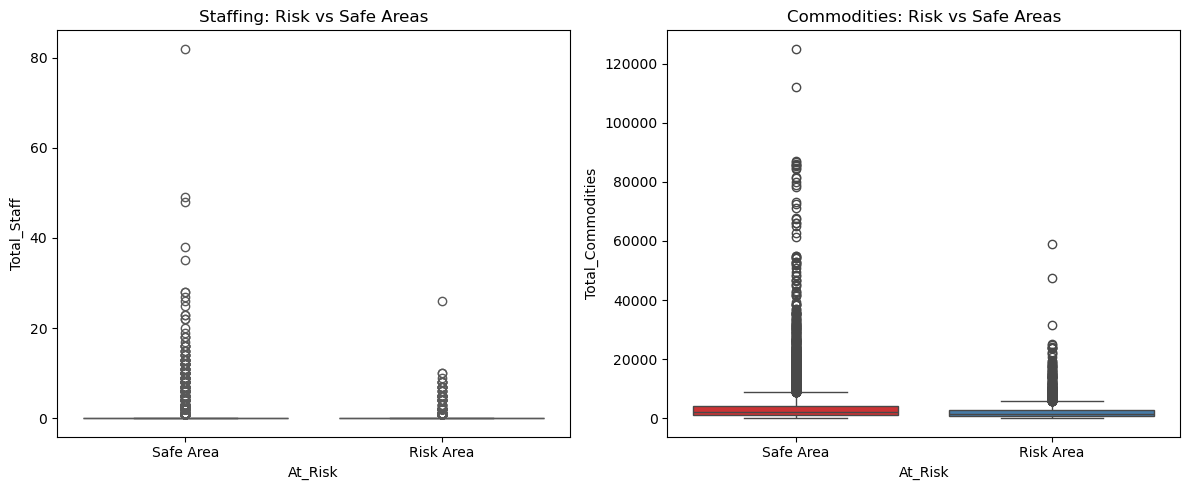

In [44]:
plt.figure(figsize=(12, 5))

# Plot for Staffing
plt.subplot(1, 2, 1)
sns.boxplot(x='At_Risk', y='Total_Staff', data=data, hue="At_Risk", palette='Set2')
plt.title('Staffing: Risk vs Safe Areas')

# Plot for Commodities
plt.subplot(1, 2, 2)
sns.boxplot(x='At_Risk', y='Total_Commodities', data=data, hue="At_Risk", palette='Set1')
plt.title('Commodities: Risk vs Safe Areas')

plt.tight_layout()
plt.show()

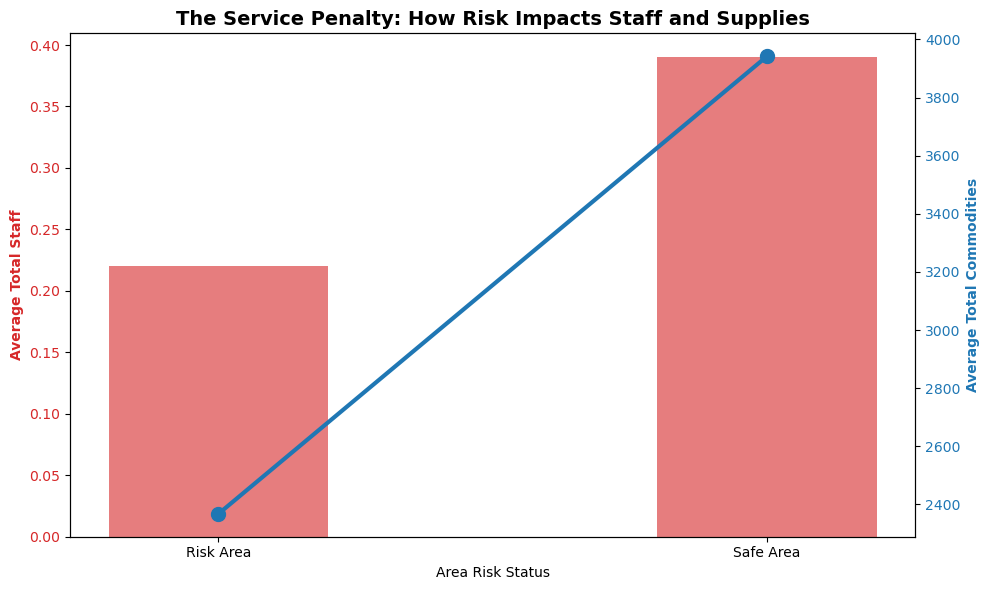

In [45]:
categories = ['Risk Area', 'Safe Area']
staff_means = [0.22, 0.39]
commodity_means = [2367.64, 3942.26] # Adjusted to scale for visibility in a dual-axis or separate plot

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Staffing Disparity
color = 'tab:red'
ax1.set_xlabel('Area Risk Status')
ax1.set_ylabel('Average Total Staff', color=color, fontweight='bold')
ax1.bar(categories, staff_means, color=color, alpha=0.6, width=0.4, label='Avg Staff')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second axis for Commodities
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Total Commodities', color=color, fontweight='bold')
ax2.plot(categories, commodity_means, color=color, marker='o', linewidth=3, markersize=10, label='Avg Commodities')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('The Service Penalty: How Risk Impacts Staff and Supplies', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.savefig('Risk_Service_Penalty_Chart.png', dpi=300)
plt.show()

![separator1](https://i.imgur.com/ZUWYTii.png)
## **Question 5**
`Which 20% of wards contribute to 80% of unmet need?`

In [46]:
data.columns.tolist()
underserved_analysis['Maternal_Gap_Score']
underserved_analysis['FP_Gap_Score']

0      65.236994
1      72.029630
2      30.331915
3      50.235849
4      37.889655
         ...    
250    40.458781
251    79.459459
252    49.103093
253    41.666667
254    46.064516
Name: FP_Gap_Score, Length: 255, dtype: float64

In [47]:
# distances is now handled in gap_metrics

In [48]:
# 1. Select "Gap" indicators
# Using the columns we derived in earlier steps
gap_metrics = ['Maternal_Gap_Score', 'FP_Gap_Score', 'Distance_Numeric']

In [49]:
# 2. Normalize the scores (0 to 1), so they have equal weight
for metric in gap_metrics:
    underserved_analysis[f'{metric}_norm'] = (underserved_analysis[metric] - underserved_analysis[metric].min()) / \
                                     (underserved_analysis[metric].max() - underserved_analysis[metric].min())

# 3. Create the Composite Unmet Need Score
# You can weight these if needed (e.g., population gaps might count for more)
underserved_analysis['Total_Unmet_Need'] = underserved_analysis[[f'{m}_norm' for m in gap_metrics]].sum(axis=1)

In [50]:
# 1. Sort wards by Total Unmet Need (Highest to Lowest)
df_pareto = underserved_analysis.sort_values(by='Total_Unmet_Need', ascending=False).reset_index(drop=True)

# 2. Calculate Cumulative Percentage of Unmet Need
df_pareto['Cumulative_Need_Pct'] = df_pareto['Total_Unmet_Need'].cumsum() / df_pareto['Total_Unmet_Need'].sum() * 100

# 3. Calculate Cumulative Percentage of Wards
df_pareto['Cumulative_Ward_Pct'] = (df_pareto.index + 1) / len(df_pareto) * 100

# 4. Identify the "Critical 20%"
critical_threshold = df_pareto[df_pareto['Cumulative_Ward_Pct'] <= 20]
total_need_covered = critical_threshold['Cumulative_Need_Pct'].max()

print(f"Top 20% of Wards account for {total_need_covered:.2f}% of the total unmet need.")

Top 20% of Wards account for 39.04% of the total unmet need.


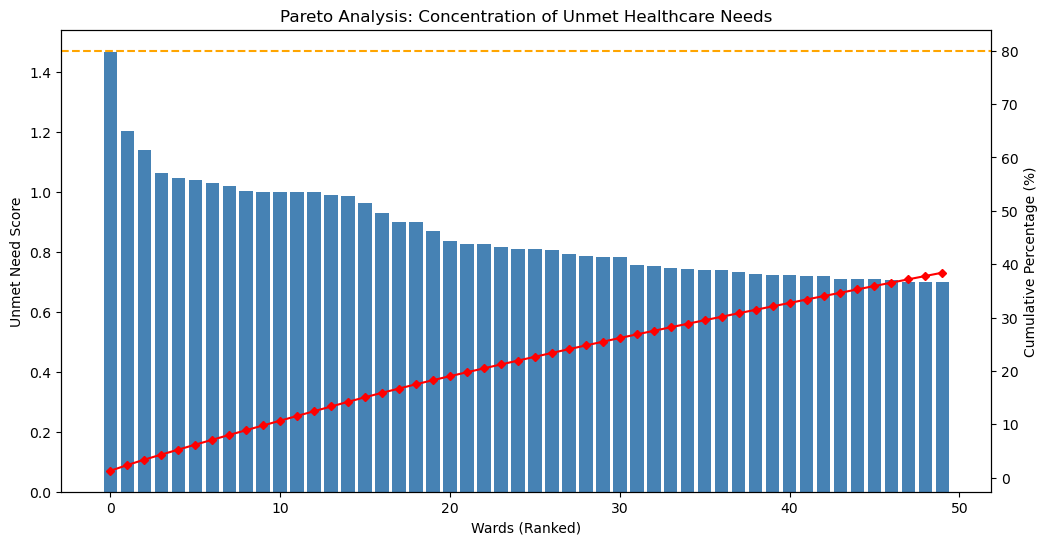

In [51]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for individual scores
ax1.bar(df_pareto.index[:50], df_pareto['Total_Unmet_Need'][:50], color='steelblue', label='Unmet Need Score')
ax1.set_ylabel('Unmet Need Score')
ax1.set_xlabel('Wards (Ranked)')

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(df_pareto.index[:50], df_pareto['Cumulative_Need_Pct'][:50], color='red', marker='D', ms=4, label='Cumulative %')
ax2.axhline(80, color='orange', linestyle='--') # The 80% line
ax2.set_ylabel('Cumulative Percentage (%)')

plt.title('Pareto Analysis: Concentration of Unmet Healthcare Needs')
plt.savefig('pareto_1.png', dpi=300, bbox_inches='tight')

plt.show()

In [52]:
# 4. Identify the "Critical 50%"
critical_threshold = df_pareto[df_pareto['Cumulative_Ward_Pct'] <= 50]
total_need_covered = critical_threshold['Cumulative_Need_Pct'].max()

print(f"Top 50% of Wards account for {total_need_covered:.2f}% of the total unmet need.")

Top 50% of Wards account for 76.57% of the total unmet need.


<hr>